<a href="https://colab.research.google.com/github/KUNALKEDARI20/Assignments/blob/main/Assignment_no_17_SVM_Salary_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT-->**1) Prepare a classification model using SVM for salary data

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work
education	-- Education of an individuals
maritalstatus -- Marital status of an individulas
occupation	 -- occupation of an individuals
relationship --
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week
native -- Native of an individual
Salary -- salary of an individual

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
# Load Train Dataset
train_df=pd.read_csv('/content/SalaryData_Train(1).csv.crdownload')
train_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16486,26,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
16487,67,Private,1st-4th,2,Widowed,Machine-op-inspct,Not-in-family,White,Female,2062.0,0.0,34.0,Ecuador,<=50K
16488,37,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K
16489,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16491 entries, 0 to 16490
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            16491 non-null  int64  
 1   workclass      16491 non-null  object 
 2   education      16491 non-null  object 
 3   educationno    16491 non-null  int64  
 4   maritalstatus  16491 non-null  object 
 5   occupation     16491 non-null  object 
 6   relationship   16491 non-null  object 
 7   race           16491 non-null  object 
 8   sex            16490 non-null  object 
 9   capitalgain    16490 non-null  float64
 10  capitalloss    16490 non-null  float64
 11  hoursperweek   16490 non-null  float64
 12  native         16490 non-null  object 
 13  Salary         16490 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.8+ MB


In [5]:
train_df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,16491.000000,16491.000000,16490.000000,16490.000000,16490.000000
mean,38.439634,10.130435,1065.410006,88.804427,40.924864
std,13.125981,2.536220,7313.107912,403.555355,11.900934
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
train_df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [7]:
# Impute the  missing values with mean (for numeric columns) and mode (for categorical columns)
train_df['sex'].fillna(train_df['sex'].mode()[0], inplace=True)
train_df['capitalgain'].fillna(train_df['capitalgain'].mean(), inplace=True)
train_df['capitalloss'].fillna(train_df['capitalloss'].mean(), inplace=True)
train_df['hoursperweek'].fillna(train_df['hoursperweek'].mean(), inplace=True)
train_df['native'].fillna(train_df['native'].mode()[0], inplace=True)
train_df['Salary'].fillna(train_df['Salary'].mode()[0], inplace=True)

In [8]:
train_df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
test_df=pd.read_csv('/content/SalaryData_Test(1).csv')
test_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [10]:
test_df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
# Combine train and test datasets
salary_df=pd.concat([train_df,test_df],axis=0)
salary_df.shape

(31551, 14)

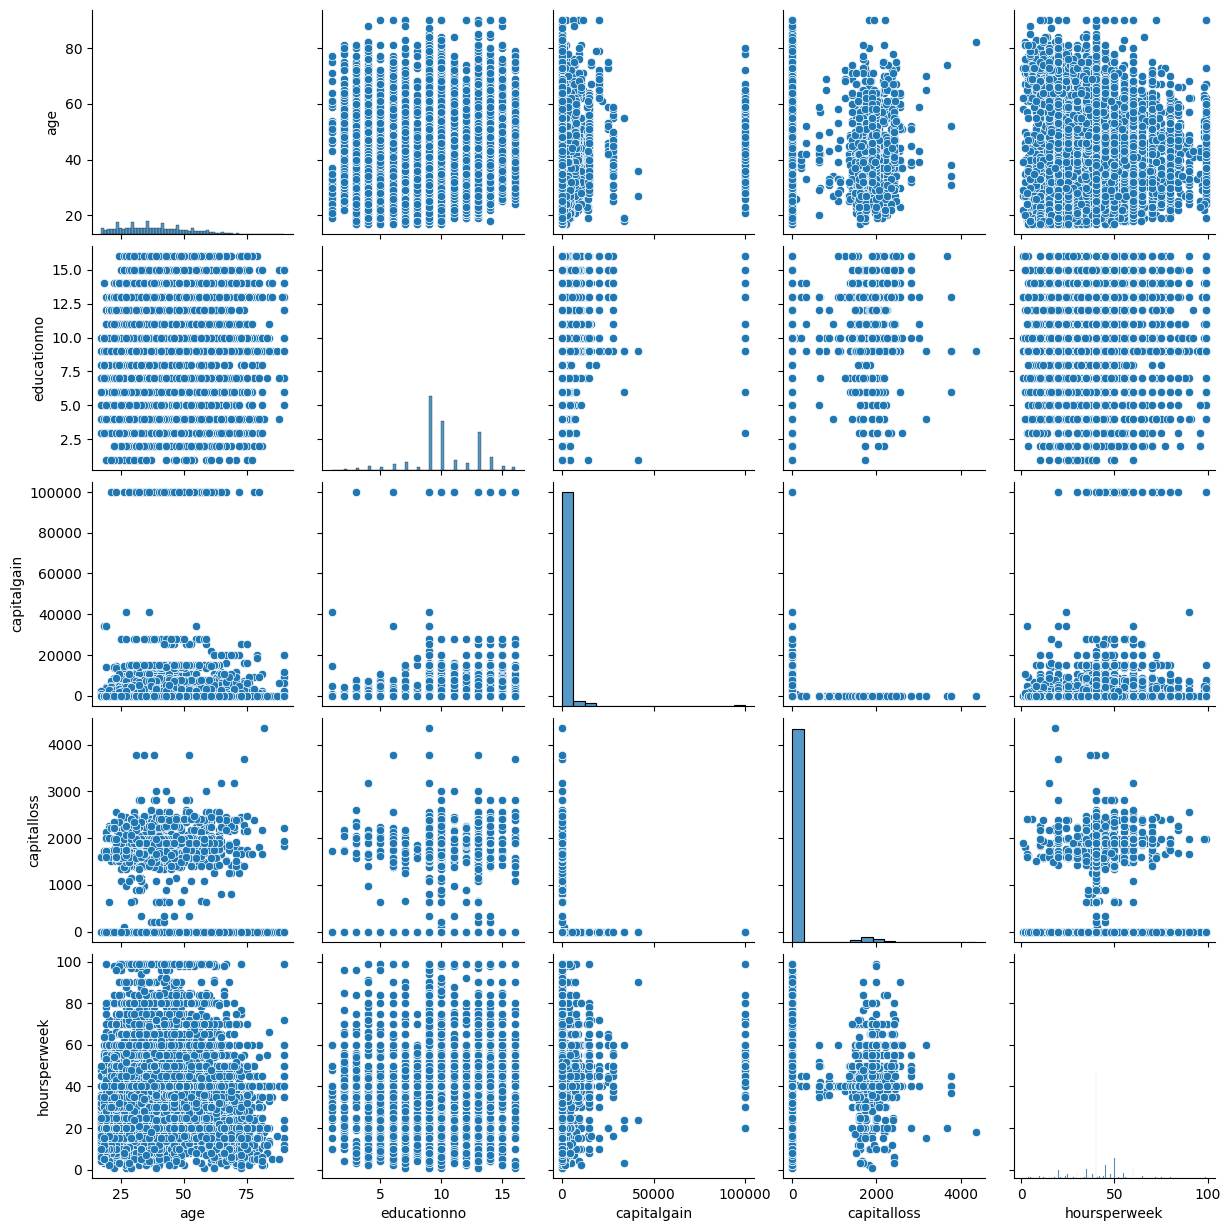

In [12]:
#Pairplot
sns.pairplot(salary_df)

In [13]:
columns=pd.Series(salary_df.columns)
columns

0               age
1         workclass
2         education
3       educationno
4     maritalstatus
5        occupation
6      relationship
7              race
8               sex
9       capitalgain
10      capitalloss
11     hoursperweek
12           native
13           Salary
dtype: object

In [14]:
# Label Encoding for Ctegorical column
le=LabelEncoder()

salary_df['workclass']=le.fit_transform(salary_df['workclass'])
salary_df['education']=le.fit_transform(salary_df['education'])
salary_df['maritalstatus']=le.fit_transform(salary_df['maritalstatus'])
salary_df['occupation']=le.fit_transform(salary_df['occupation'])
salary_df['relationship']=le.fit_transform(salary_df['relationship'])
salary_df['race']=le.fit_transform(salary_df['race'])
salary_df['sex']=le.fit_transform(salary_df['sex'])
salary_df['native']=le.fit_transform(salary_df['native'])

In [15]:
salary_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,5,1,2174.0,0.0,40.0,37,<=50K
1,50,4,9,13,2,3,0,5,1,0.0,0.0,13.0,37,<=50K
2,38,2,11,9,0,5,1,5,1,0.0,0.0,40.0,37,<=50K
3,53,2,1,7,2,5,0,3,1,0.0,0.0,40.0,37,<=50K
4,28,2,9,13,2,9,5,3,0,0.0,0.0,40.0,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,5,1,0.0,0.0,40.0,37,<=50K
15056,39,2,9,13,0,9,1,5,0,0.0,0.0,36.0,37,<=50K
15057,38,2,9,13,2,9,0,5,1,0.0,0.0,50.0,37,<=50K
15058,44,2,9,13,0,0,3,2,1,5455.0,0.0,40.0,37,<=50K


In [16]:
#Divide the data into feature and target variable
X=salary_df.iloc[:,:13]
Y=salary_df.iloc[:,-1]

In [17]:
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return x

x_norm = norm_func(X)
x_norm

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.6,1.0,0.000000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.6,0.0,0.000000,0.0,0.397959,0.102564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.600000,0.800000,0.666667,0.692308,0.6,1.0,1.0,0.000000,0.0,0.397959,0.948718
15056,0.301370,0.333333,0.600000,0.800000,0.000000,0.692308,0.2,1.0,0.0,0.000000,0.0,0.357143,0.948718
15057,0.287671,0.333333,0.600000,0.800000,0.333333,0.692308,0.0,1.0,1.0,0.000000,0.0,0.500000,0.948718
15058,0.369863,0.333333,0.600000,0.800000,0.000000,0.000000,0.6,0.4,1.0,0.054551,0.0,0.397959,0.948718


In [ ]:
#Feature Scaling
#from sklearn.preprocessing import StandardScaler

#sc=StandardScaler()
#X_scaled=sc.fit_transform(X)
#X_scaled

In [18]:
# Split the data into train and test
xtrain,xtest,ytrain,ytest=train_test_split(x_norm,Y,test_size=0.33,random_state=42)

In [19]:
xtrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
9756,0.315068,0.333333,0.600000,0.800000,0.333333,0.538462,1.0,1.0,0.0,0.00000,0.0,0.397959,0.794872
14208,0.342466,0.333333,0.733333,0.533333,0.666667,0.538462,0.2,0.6,1.0,0.00000,0.0,0.397959,0.948718
1576,0.328767,0.333333,0.800000,0.866667,0.333333,0.692308,0.0,0.4,1.0,0.00000,0.0,0.448980,0.051282
4836,0.520548,0.333333,1.000000,0.600000,0.333333,0.923077,0.0,1.0,1.0,0.00000,0.0,0.397959,0.948718
8527,0.589041,0.833333,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.397959,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13311,0.479452,0.333333,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.397959,0.948718
5390,0.328767,0.666667,1.000000,0.600000,0.333333,0.461538,0.0,1.0,1.0,0.03103,0.0,0.397959,0.948718
860,0.273973,0.333333,0.733333,0.533333,0.333333,0.153846,0.0,1.0,1.0,0.00000,0.0,1.000000,0.948718
15795,0.534247,0.666667,0.066667,0.400000,0.333333,0.538462,1.0,1.0,0.0,0.00000,0.0,0.397959,0.948718


In [20]:
ytrain

9756      <=50K
14208     <=50K
1576       >50K
4836      <=50K
8527       >50K
          ...  
13311     <=50K
5390       >50K
860        >50K
15795     <=50K
7163      <=50K
Name: Salary, Length: 21139, dtype: object

In [ ]:
print(xtrain.shape)
print(ytrain.shape)

(21139, 13)
(21139,)


SVM Classifier

1.RBF

In [21]:
#RBF
svm=SVC(kernel='rbf',gamma=0.02,random_state=7) #SVM classifier
svm.fit(xtrain,ytrain)
y_pred=svm.predict(xtest) #Prediction
acc=accuracy_score(ytest,y_pred)*100
print('Accuracy:',acc)
print(classification_report(ytest, y_pred))

Accuracy: 79.5908567038033
              precision    recall  f1-score   support

       <=50K       0.80      0.98      0.88      7802
        >50K       0.80      0.25      0.38      2610

    accuracy                           0.80     10412
   macro avg       0.80      0.61      0.63     10412
weighted avg       0.80      0.80      0.75     10412



In [23]:
#Hyperparameter Tunning using GridSearchCV
num_folds=5
kfold=KFold(n_splits=num_folds)


In [ ]:
#To get optimal value of Gamma we use GridSearchCV method
svm_classifier=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[0.001,40,0.01,0.2,10]}]
rbf=GridSearchCV(estimator=svm_classifier,param_grid=param_grid,cv=kfold)
rbf.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid=[{'gamma': [0.001, 40, 0.01, 0.2, 10],
                          'kernel': ['rbf']}])

In [ ]:
#Best Scores & Hyperparameter
rbf.best_params_,rbf.best_score_

({'gamma': 10, 'kernel': 'rbf'}, 0.835327630927817)

RBF Accuracy=83.53% with gamma=10

**2.POLYNOMIAL**

In [22]:
svm=SVC(kernel='poly',random_state=7) #SVM classifier
svm.fit(xtrain,ytrain)
y_pred=svm.predict(xtest) #Prediction
acc=accuracy_score(ytest,y_pred)*100
print('Accuracy:',acc)

Accuracy: 83.93200153668843


In [ ]:
#Poly
svm_classifier=SVC()
param_grid=[{'kernel':['poly'],'gamma':[0.001,0.03,40,1,5,20]}]
poly=GridSearchCV(estimator=svm_classifier,param_grid=param_grid,cv=kfold)
poly.fit(xtrain,ytrain)

In [ ]:
#Best Scores & Hyperparameter
rbf.best_params_,rbf.best_score_

**Conclusion--**

**Final Evalution**